### Evrlearn vacancies


Here we will extract and analyse the egnlish Evrlearn vacancies.

In [1]:
import sys
sys.path.append("../protosp01/skillExtract/")
from utils import detect_language, split_sentences


import pandas as pd
import json
from tqdm.notebook import tqdm
import seaborn as sns

tqdm.pandas()

In [2]:
with open("../data/raw/vacancies.json", "r") as f:
    df = pd.DataFrame(json.load(f))

df.head()

,id,name,orig_url,company_name,company_url,lead,description
0,4623,Business Analyst Leistungen,https://www.jobs.ch/en/vacancies/detail/70cabf...,ELCA Informatik AG,https://www.jobs.ch/en/companies/11529-elca-in...,None,Um unser Wachstum weiterhin erfolgreich fortzu...
1,15,Securities Master Data Specialist (Ref. 2177),https://www.jobs.ch/en/vacancies/detail/0f8346...,None,None,None,"<!DOCTYPE html>\n<html lang=""en"" data-template..."
2,2226,IT Supporter (m/w),https://www.jobs.ch/en/vacancies/detail/e72b68...,univativ Schweiz AG,https://www.jobs.ch/en/companies/95851-univati...,"Ob Student, Berufseinsteiger oder Berufserfahr...",Karrierelevel: Berufseinsteiger Pensum: 80-10...
3,5,Scrum Master/-in & Applikations-Analyst/-in Ep...,https://www.jobs.ch/en/vacancies/detail/9a1fa7...,None,None,None,Das Luzerner Kantonsspital mit den Standorten ...
4,16,"Product Owner ""Financial Messaging"" for Multib...",https://www.jobs.ch/en/vacancies/detail/703709...,None,None,None,"<!DOCTYPE html>\n<html lang=""en"" data-template..."


#### Filtering on english vacancies

In [3]:
df["lang"] = df.description.progress_apply(detect_language)

  0%|          | 0/13649 [00:00<?, ?it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='lang', ylabel='doc_count'>

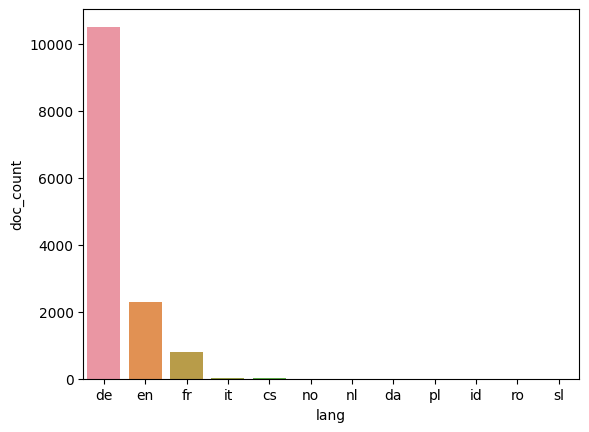

In [4]:
langs = df[["lang", "id"]].groupby("lang").count().reset_index()
langs["doc_count"] = langs.id
langs = langs.drop("id", axis=1).sort_values("doc_count", ascending=False)
sns.barplot(data=langs, x="lang", y="doc_count")

In [5]:
df_en = df[df.lang == "en"]
print(len(df_en.index))

2281


In [ ]:
df_en.to_csv("../data/raw/en_vacancies.csv")

#### Processing the english descriptions

In [2]:
import pandas as pd
import seaborn as sns

df_en = pd.read_csv("../data/raw/en_vacancies.csv").drop("Unnamed: 0", axis=1)

In [12]:
## we compute the distribution of the numbers of JobBERT tokens in the real vacancies

from transformers import AutoTokenizer

word_emb = "jjzha/jobbert-base-cased"
word_emb_tokenizer = AutoTokenizer.from_pretrained(word_emb)

df_en["nb_tokens"] = df_en.description.apply(lambda x : len(word_emb_tokenizer(x, truncation=True)["input_ids"]))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/tmp/ipykernel_16110/169770955.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en["nb_tokens"] = df_en.description.apply(lambda x : len(word_emb_tokenizer(x, truncation=True)["input_ids"]))


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


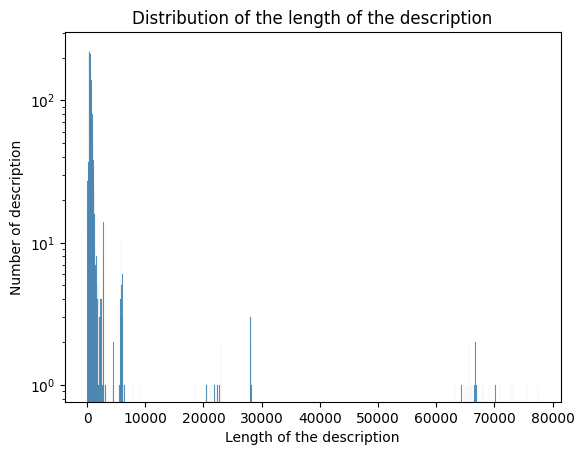

In [15]:
g = sns.histplot(data=df_en, x="nb_tokens")
g.set_title("Distribution of the length of the description")
g.set_xlabel("Length of the description")
g.set_ylabel("Number of description")
g.set_yscale("log")

Some of the job offers are in HTML format. Let's analyse the distribution and try to process them.

/tmp/ipykernel_15355/3674572647.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df_en["is_html"] = df_en["description"].apply(lambda d : bool(BeautifulSoup(d, "html.parser").find()))
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/env

Text(0.5, 0, 'Is HTML ?')

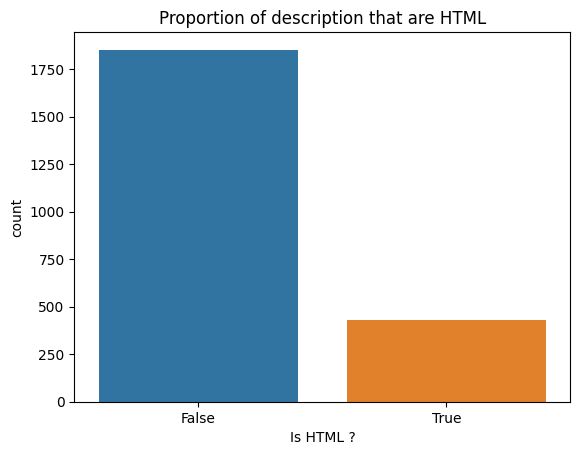

In [3]:
from bs4 import BeautifulSoup

df_en["is_html"] = df_en["description"].apply(lambda d : bool(BeautifulSoup(d, "html.parser").find()))

g = sns.countplot(data=df_en, x="is_html")
g.set_title("Proportion of description that are HTML")
g.set_xlabel("Is HTML ?")

In [4]:
html_desc = df_en[df_en["is_html"]]
html_desc["extract"] = html_desc["description"].apply(lambda d : \
                                                      BeautifulSoup(d, "html.parser")\
                                                        .get_text())
print("Extracted ", len(html_desc.index), " description")
redirection_failure = """\n\n\n\n\n\nredirecting...\n\n\n\nRedirection to company website\nRedirection failed? Click here.\n\n\n"""
html_desc = html_desc[html_desc["extract"] != redirection_failure] ## a lot of samples are lost here
print("After redirection failure filtering ", len(html_desc.index), " samples kept")
html_desc["description"] = html_desc["extract"]
html_desc = html_desc.drop("extract", axis=1)

Extracted  428  description
After redirection failure filtering  115  samples kept


/tmp/ipykernel_15355/3418263572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  html_desc["extract"] = html_desc["description"].apply(lambda d : \


In [5]:
df = pd.concat([df_en[~df_en.is_html], html_desc])

In [6]:
df.to_csv("../data/raw/en_vacancies_clean.csv")

#### Processing of the sentences

In [2]:
import pandas as pd
import seaborn as sns

df_en = pd.read_csv("../data/raw/en_vacancies_clean.csv").drop("Unnamed: 0", axis=1)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(1.0, 10000.0)

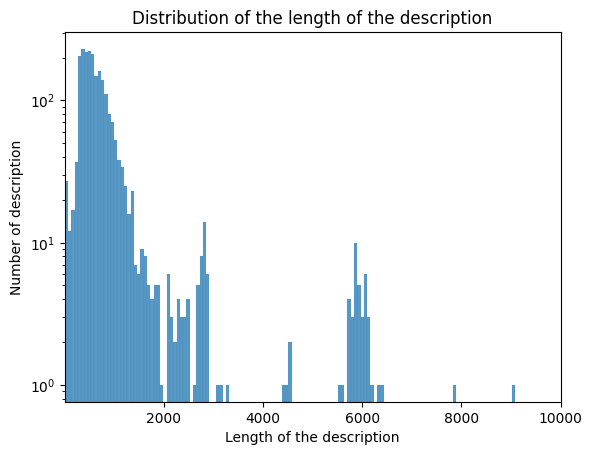

In [25]:
from transformers import AutoTokenizer

word_emb = "jjzha/jobbert-base-cased"
word_emb_tokenizer = AutoTokenizer.from_pretrained(word_emb)

df_en["nb_tokens_processed"] = df_en.description.apply(lambda x : len(word_emb_tokenizer(x, truncation=True)["input_ids"]))


g = sns.histplot(data=df_en, x="nb_tokens_processed")
g.set_title("Distribution of the length of the description")
g.set_xlabel("Length of the description")
g.set_ylabel("Number of description")
g.set_yscale("log")
g.set_xlim((1, 10_000))

In [ ]:
import nltk
from nltk import sent_tokenize, word_tokenize
from transformers import AutoModel, AutoTokenizer
import numpy as np
nltk.download('punkt')

## loading the proper tokenizer to compute the number of tokens
tok = AutoTokenizer.from_pretrained("jjzha/jobbert-base-cased")


def get_number_of_tokens(s):
    if(s != np.nan):
        tokens = tok.tokenize(s)
        return len(tokens)


def sliding_window_gen(sentences, N):
    concat_sentences = []
    max_idx = len(sentences) - N
    if(max_idx <= 0):
        return []
    for i in range(max_idx):
        concat_sentences.append(" ".join(sentences[i:i + N]))
    return concat_sentences

df = df_en
df["sentences"] = df["description"].progress_apply(split_sentences)
print("> Sentences splitted")
df["nb_of_sentences"] = df["sentences"].progress_apply(len)
enhanced_df = df.copy() ## for later enhancing sentences
df = df.explode("sentences")
df["sentence_len"] = df["sentences"].progress_apply(get_number_of_tokens)
print("> computed number of tokens for simple sentences")

enhanced_df["enhanced_sentences"] = enhanced_df["sentences"].progress_apply(lambda sents : sliding_window_gen(sents, 2))
print("> Enhanced sentences")
enhanced_df = enhanced_df.explode("enhanced_sentences").dropna()
enhanced_df["sentence_len"] = enhanced_df["enhanced_sentences"].progress_apply(get_number_of_tokens)
print("> computed number of tokens for enhanced sentences")


In [5]:
enhanced_df

,id,name,orig_url,company_name,company_url,lead,description,lang,is_html,sentences,nb_of_sentences,enhanced_sentences,sentence_len
11,5259,Pre-Sales Engineer,https://www.jobs.ch/en/vacancies/detail/8d1cf1...,CCR GmbH,https://www.jobs.ch/en/companies/95026-ccr-gmbh/,We are seeking a highly skilled and motivated ...,Presales Engineer - Cloud Contact Center Softw...,en,False,[Presales Engineer - Cloud Contact Center Soft...,22,Presales Engineer - Cloud Contact Center Softw...,68
11,5259,Pre-Sales Engineer,https://www.jobs.ch/en/vacancies/detail/8d1cf1...,CCR GmbH,https://www.jobs.ch/en/companies/95026-ccr-gmbh/,We are seeking a highly skilled and motivated ...,Presales Engineer - Cloud Contact Center Softw...,en,False,[Presales Engineer - Cloud Contact Center Soft...,22,"As a Pre-sales Engineer, you will be responsib...",52
11,5259,Pre-Sales Engineer,https://www.jobs.ch/en/vacancies/detail/8d1cf1...,CCR GmbH,https://www.jobs.ch/en/companies/95026-ccr-gmbh/,We are seeking a highly skilled and motivated ...,Presales Engineer - Cloud Contact Center Softw...,en,False,[Presales Engineer - Cloud Contact Center Soft...,22,Â The Company: CCR has been providing solutio...,39
11,5259,Pre-Sales Engineer,https://www.jobs.ch/en/vacancies/detail/8d1cf1...,CCR GmbH,https://www.jobs.ch/en/companies/95026-ccr-gmbh/,We are seeking a highly skilled and motivated ...,Presales Engineer - Cloud Contact Center Softw...,en,False,[Presales Engineer - Cloud Contact Center Soft...,22,The company was founded in January 2011 by som...,67
11,5259,Pre-Sales Engineer,https://www.jobs.ch/en/vacancies/detail/8d1cf1...,CCR GmbH,https://www.jobs.ch/en/companies/95026-ccr-gmbh/,We are seeking a highly skilled and motivated ...,Presales Engineer - Cloud Contact Center Softw...,en,False,[Presales Engineer - Cloud Contact Center Soft...,22,"A Genesys and Microsoft Gold partner, with ove...",69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,15142,Site Reliability / DevOps Engineer (SRE) (w/m),https://www.jobs.ch/en/vacancies/detail/173cb4...,Ãrztekasse Genossenschaft,https://www.jobs.ch/en/companies/91624-aerztek...,Ãrztekasse Genossenschaft provides business p...,Pensum: 80-100%Start: immediately or by appoin...,en,False,[Pensum: 80-100%Start: immediately or by appoi...,11,We look forward to receiving your application!...,15
1845,15671,Intraday Asset Trader (f/m/d),https://www.jobs.ch/en/vacancies/detail/57a441...,Alpiq,https://www.jobs.ch/en/companies/99097-alpiq-ag/,Alpiq Holding Ltd. is a Swiss energy company o...,Are you passionate about the fast-paced world ...,en,False,[Are you passionate about the fast-paced world...,4,Are you passionate about the fast-paced world ...,31
1845,15671,Intraday Asset Trader (f/m/d),https://www.jobs.ch/en/vacancies/detail/57a441...,Alpiq,https://www.jobs.ch/en/companies/99097-alpiq-ag/,Alpiq Holding Ltd. is a Swiss energy company o...,Are you passionate about the fast-paced world ...,en,False,[Are you passionate about the fast-paced world...,4,"Are you a highly motivated, analytical thinker...",54
1846,15678,Application Supporter 2nd Level,https://www.jobs.ch/en/vacancies/detail/9376e1...,Pro Informatik AG,https://www.jobs.ch/en/companies/6114-pro-info...,Critical eBanking Application - Unix - Java Ap...,Responsibilities Application support of seve...,en,False,[Responsibilities Application support of sever...,4,Responsibilities Application support of severa...,208


/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/magron/miniconda3/envs/nlp1/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/

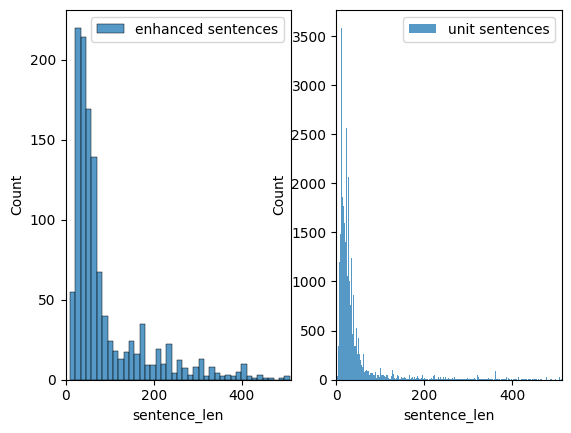

In [47]:
from matplotlib import pyplot as plt
f, a = plt.subplots(1, 2)
sns.histplot(data=enhanced_df, x="sentence_len", label="enhanced sentences", ax=a[0])
g = sns.histplot(data=df, x="sentence_len", label="unit sentences", ax=a[1])
a[0].set_xlim((0, 512))
a[1].set_xlim((0, 512))

a[1].legend()
a[0].legend()

Limiting to the sentences that fit JobBERT

In [48]:
df = df[df.sentence_len <= 512]
enhanced_df = enhanced_df[enhanced_df.sentence_len <= 512]

In [51]:
df.to_csv("../data/processed/real/job_offers_sentences.csv")
enhanced_df.to_csv("../data/processed/real/job_offers_compound_2.csv")

### Find examples of negative samples

In [47]:
from random import sample

sample(list(df["description"].apply(lambda x : ". ".join(x.split(". ")[:1])).values), 10)

["Your Mission:  Are you experienced in planning, implementing, and operating modern networks? With the position as IT-Network Engineer (m/f/d) you'll be a major contributor within ongoing migration and modernization projects! Â\xa0  Your tasks:   Monitoring, optimization, maintenance, and upgrade of the existing corporate network infrastructure Monitor network performance, test for weaknesses, and conduct regular security review Specify system requirements and design solutions Preparation and maintenance of policies and documentation General IT operational support e.g., resolving problems reported by end user  Â\xa0  Your profile:   A degree in computer science or equivalent professional training with relevant work experience Professional experience in a network administrator role Excellent knowledge of best practices around network management and network security Experience with CISCO and Palo Alto firewalls, VPNâ\x80\x99s implementation, troubleshooting /problem resolution Excellent

In [ ]:
["At EY, you'll have the chance to build a career as unique as you are, with the global scale, support, inclusive culture and technology to become the best version of you",
 "With 1500 employees from more than 30 countries and cultures working at 14 sites, Skyguide provides air traffic control services for Switzerland and parts of neighbouring countries",
 "We offer flexible working hours based on a 40-hour week, vacation entitlement: 25 days from the age of 20, 27 days from the age of 40 and 30 days from the age of 50.",
 "You'd be joining a modern and innovative environment.Our organizational culture is based on trust, personal freedom and individual responsibility",
 "L'OCCITANE Group is a global, natural and organic ingredient-based cosmetics and well-being products maker, producer and retailer",
 "Hexagon is a leading provider of digital reality solutions and employs more than 24,000 people in 50 countries"]